In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os 
import warnings

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [2]:
os.getcwd()

'C:\\Users\\008TU ( 866J )'

In [3]:
train =pd.read_csv("C:\\Users\\008TU ( 866J )\\Desktop\\HR_ANALYSIS\\train_LZdllcl.csv")

In [4]:
test =pd.read_csv("C:\\Users\\008TU ( 866J )\\Desktop\\HR_ANALYSIS\\test_2umaH9m.csv")

In [5]:
hr=train.append(test)

In [6]:
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 9.0+ MB


In [8]:
hr.shape

(78298, 14)

In [9]:
hr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
### chake summarry
hr.describe(include="O")

,department,region,education,gender,recruitment_channel
count,78298,78298,74855,78298,78298
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,24155,17642,52247,55092,43524


## Finde and fill null values

In [87]:
## find null value
hr.isnull().sum()

no_of_trainings             0
age                         0
previous_year_rating        0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [12]:
hr["education"].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

Observesion:-Education is not used to determine the promotion.Drop the coloumn.

In [13]:
hr.drop(['education'],axis=1,inplace=True)

In [14]:
hr.columns

Index(['employee_id', 'department', 'region', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [15]:
#Replacing the NaN values in the previous_rating_coloumn with 0.
hr['previous_year_rating'].fillna(0,inplace = True)

In [16]:
hr.isnull().sum()

employee_id                 0
department                  0
region                      0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [17]:
## correlation
# hr.corr()

## UNI-Variate Analysis:-

In [18]:
hr["department"].value_counts(normalize=True)*100

Sales & Marketing    30.850086
Operations           20.577793
Procurement          12.973511
Technology           12.962017
Analytics             9.797185
Finance               4.632302
HR                    4.473933
Legal                 1.895323
R&D                   1.837850
Name: department, dtype: float64

In [19]:
hr["region"].value_counts(normalize=True)*100

region_2     22.531865
region_22    11.707834
region_7      8.716698
region_15     5.029503
region_13     4.872411
region_26     4.177629
region_31     3.549261
region_4      3.164832
region_27     3.025620
region_16     2.624588
region_28     2.443230
region_11     2.408746
region_23     2.159698
region_29     1.798258
region_32     1.759943
region_19     1.639889
region_14     1.503231
region_20     1.501954
region_17     1.477688
region_25     1.476411
region_5      1.415106
region_6      1.261846
region_30     1.187770
region_8      1.180107
region_10     1.171167
region_1      1.083042
region_24     0.928504
region_12     0.913178
region_9      0.766303
region_21     0.753531
region_3      0.629646
region_34     0.570896
region_33     0.504483
region_18     0.065136
Name: region, dtype: float64

Observation:- region is not used to determine the promotion.Drop the coloumn.

In [20]:
hr.drop(['region'],axis=1,inplace=True)

In [21]:
hr.columns

Index(['employee_id', 'department', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [22]:
hr["gender"].value_counts(normalize=True)*100

m    70.36195
f    29.63805
Name: gender, dtype: float64

In [23]:
hr["recruitment_channel"].value_counts(normalize=True)*100

other       55.587627
sourcing    42.377839
referred     2.034535
Name: recruitment_channel, dtype: float64

Observation:- recruitment_channel is not used to determine the promotion.Drop the coloumn.

In [24]:
hr.drop(['recruitment_channel'],axis=1,inplace=True)

In [25]:
hr.columns

Index(['employee_id', 'department', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [26]:
hr["no_of_trainings"].value_counts(normalize=True)*100

1     80.852640
2     14.727068
3      3.232522
4      0.840379
5      0.209456
6      0.086848
7      0.026821
8      0.008940
9      0.008940
10     0.006386
Name: no_of_trainings, dtype: float64

In [27]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   gender                78298 non-null  object 
 3   no_of_trainings       78298 non-null  int64  
 4   age                   78298 non-null  int64  
 5   previous_year_rating  78298 non-null  float64
 6   length_of_service     78298 non-null  int64  
 7   KPIs_met >80%         78298 non-null  int64  
 8   awards_won?           78298 non-null  int64  
 9   avg_training_score    78298 non-null  int64  
 10  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 7.2+ MB


## Outliers and Impact On Machine Learning

In [28]:
hr.columns

Index(['employee_id', 'department', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

C:\Users\008TU ( 866J )\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_trainings'>

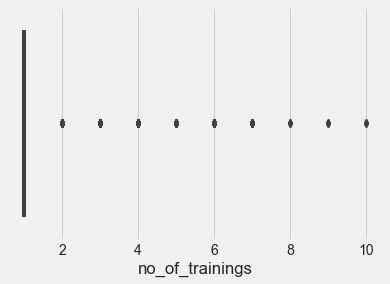

In [29]:
sns.boxplot(hr.no_of_trainings)

C:\Users\008TU ( 866J )\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length_of_service'>

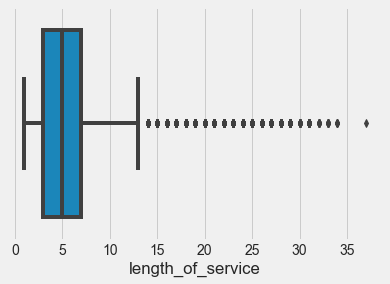

In [30]:
sns.boxplot(hr.length_of_service)

C:\Users\008TU ( 866J )\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

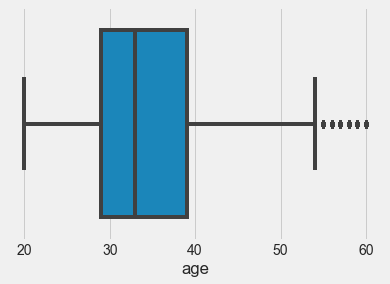

In [31]:
sns.boxplot(hr.age)

### outlier tritment

In [32]:
p99=np.percentile(hr.no_of_trainings,99.5)

In [33]:
p99

4.0

In [34]:
hr['no_of_trainings']=np.where(hr.length_of_service>p99,p99,hr.length_of_service)

In [35]:
hr['no_of_trainings'].describe()

count    78298.000000
mean         3.376855
std          0.989937
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: no_of_trainings, dtype: float64

C:\Users\008TU ( 866J )\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_of_trainings', ylabel='Density'>

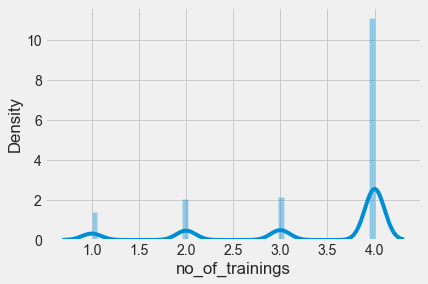

In [36]:
sns.distplot(hr['no_of_trainings'])

C:\Users\008TU ( 866J )\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length_of_service'>

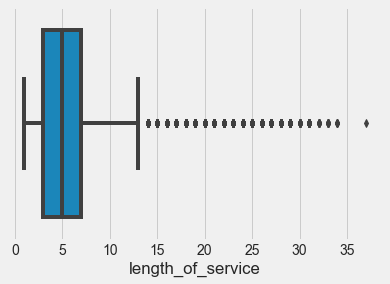

In [37]:
sns.boxplot(hr['length_of_service'])

In [38]:
p99=np.percentile(hr.length_of_service,99.5)

In [39]:
p99

24.0

In [40]:
hr['length_of_service']=np.where(hr.length_of_service>p99,p99,hr.length_of_service)

In [41]:
hr['length_of_service'].describe()

count    78298.000000
mean         5.832920
std          4.168645
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         24.000000
Name: length_of_service, dtype: float64

C:\Users\008TU ( 866J )\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

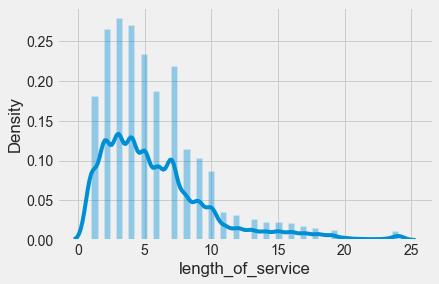

In [42]:
sns.distplot(hr['length_of_service'])

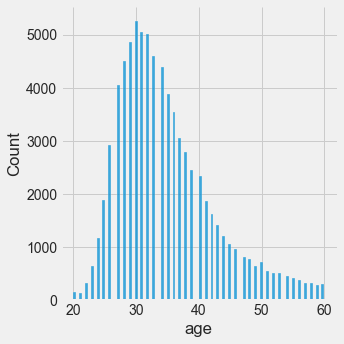

In [43]:
sns.displot(hr.age)

### LabelEncoding

In [44]:
hr.describe(include="O")

,department,gender
count,78298,78298
unique,9,2
top,Sales & Marketing,m
freq,24155,55092


In [45]:
## LabelEncoding
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()


In [46]:
hr['department']=la.fit_transform(hr['department'])

In [47]:
hr['department'].value_counts()

7    24155
4    16112
5    10158
8    10149
0     7671
1     3627
2     3503
3     1484
6     1439
Name: department, dtype: int64

In [48]:
hr['gender']=la.fit_transform(hr['gender'])

In [49]:
hr['gender'].value_counts()

1    55092
0    23206
Name: gender, dtype: int64

In [50]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  int32  
 2   gender                78298 non-null  int32  
 3   no_of_trainings       78298 non-null  float64
 4   age                   78298 non-null  int64  
 5   previous_year_rating  78298 non-null  float64
 6   length_of_service     78298 non-null  float64
 7   KPIs_met >80%         78298 non-null  int64  
 8   awards_won?           78298 non-null  int64  
 9   avg_training_score    78298 non-null  int64  
 10  is_promoted           54808 non-null  float64
dtypes: float64(4), int32(2), int64(5)
memory usage: 6.6 MB


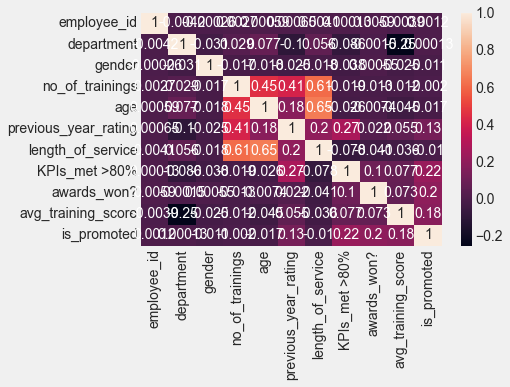

In [51]:
figsize=(18,30)
sns.heatmap(hr.corr(),annot=True)
plt.show()

In [52]:
 hr.corr()

,employee_id,department,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.004213,-0.000263,0.002685,0.000586,0.000646,0.004091,0.000127,0.005943,-0.003930,0.001206
department,-0.004213,1.000000,-0.030945,0.029430,0.077374,-0.100498,0.055791,-0.086025,-0.001526,-0.254870,0.000130
gender,-0.000263,-0.030945,1.000000,-0.017395,-0.017816,-0.024587,-0.017747,-0.037916,0.000553,-0.024840,-0.011109
no_of_trainings,0.002685,0.029430,-0.017395,1.000000,0.452311,0.408224,0.608351,-0.019004,-0.013259,-0.011863,-0.002026
age,0.000586,0.077374,-0.017816,0.452311,1.000000,0.181352,0.654415,-0.026223,-0.007357,-0.044592,-0.017166
previous_year_rating,0.000646,-0.100498,-0.024587,0.408224,0.181352,1.000000,0.196175,0.273625,0.021647,0.055040,0.125991
length_of_service,0.004091,0.055791,-0.017747,0.608351,0.654415,0.196175,1.000000,-0.078306,-0.040737,-0.035818,-0.010482
KPIs_met >80%,0.000127,-0.086025,-0.037916,-0.019004,-0.026223,0.273625,-0.078306,1.000000,0.100365,0.076729,0.221582
awards_won?,0.005943,-0.001526,0.000553,-0.013259,-0.007357,0.021647,-0.040737,0.100365,1.000000,0.072655,0.195871
avg_training_score,-0.003930,-0.254870,-0.024840,-0.011863,-0.044592,0.055040,-0.035818,0.076729,0.072655,1.000000,0.181147


In [53]:
hr.isnull().sum()

employee_id                 0
department                  0
gender                      0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [70]:
hr.drop(['employee_id','department','gender','length_of_service'],axis=1,inplace=True)

In [71]:
hr.head()

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,4.0,35,5.0,1,0,49,0.0
1,4.0,30,5.0,0,0,60,0.0
2,4.0,34,3.0,0,0,50,0.0
3,4.0,39,1.0,0,0,50,0.0
4,2.0,45,3.0,0,0,73,0.0


In [72]:
test_cl=hr[hr['is_promoted'].isnull()]
train_cl=hr[hr['is_promoted'].notnull()]

In [73]:
test_cl.shape

(23490, 7)

In [74]:
test_cl.shape

(23490, 7)

## splitting train dataset

In [75]:
train_y=train_cl["is_promoted"]
train_x=train_cl.drop("is_promoted",axis=1)
test_cl=test_cl.drop("is_promoted",axis=1)

In [76]:
train_x.head()

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,4.0,35,5.0,1,0,49
1,4.0,30,5.0,0,0,60
2,4.0,34,3.0,0,0,50
3,4.0,39,1.0,0,0,50
4,2.0,45,3.0,0,0,73


# logistic regression

In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [78]:
lr.fit(train_x,train_y)

LogisticRegression()

In [79]:
pred_labels=lr.predict(test_cl)

In [80]:
pred_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
predicted=pd.concat([test_cl,pd.DataFrame(pred_labels)],axis=1)

In [82]:
predicted.head()

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,0
0,1.0,24,0.0,1,0,77,0.0
1,4.0,31,3.0,0,0,51,0.0
2,4.0,31,1.0,0,0,47,0.0
3,4.0,31,2.0,0,0,65,0.0
4,4.0,30,4.0,0,0,61,0.0


In [85]:
predicted.to_csv("logisticoutput3.csv")

In [86]:
import os
os.getcwd()

'C:\\Users\\008TU ( 866J )'